In [1]:
from __future__ import print_function
from joblib import dump,load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from math import sqrt
from sklearn import model_selection
import math
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data Processed/yield_recommendation.csv')

In [3]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [4]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
df.shape

(246091, 7)

In [7]:
df.size

1722637

In [8]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [9]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [10]:
print("total Unique Values in State:",df['State_Name'].nunique())
print()
print("Unique Values in State:",df['State_Name'].unique())
print()

total Unique Values in State: 33

Unique Values in State: ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']



In [11]:
print("total Unique Values in Crop:",df['Crop'].nunique())
print()
print("Unique Values in Crop:",df['Crop'].unique())
print()

total Unique Values in Crop: 124

Unique Values in Crop: ['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'P

In [12]:
print("total Unique Values in Year:",df['Crop_Year'].nunique())
print()
print("Unique Values in Year:",df['Crop_Year'].unique())
print()

total Unique Values in Year: 19

Unique Values in Year: [2000 2001 2002 2003 2004 2005 2006 2010 1997 1998 1999 2007 2008 2009
 2011 2012 2013 2014 2015]



In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_n = df.select_dtypes(include=numerics)       #  numeric dataframe
objects = ['O']
df_o = df.select_dtypes(include=objects)        #  objective dataframe

In [14]:
df_n.columns         #  numeric dataframe

Index(['Crop_Year', 'Area', 'Production'], dtype='object')

In [15]:
df_o.columns        #  objective dataframe

Index(['State_Name', 'District_Name', 'Season', 'Crop'], dtype='object')

<AxesSubplot:>

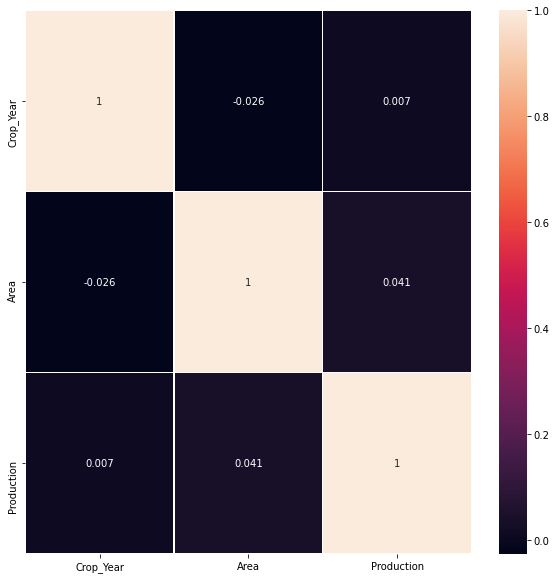

In [16]:
# Correlation
# sns.heatmap(df.corr(),annot=True)
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

# cleaning

In [17]:
df['Crop_Year'] = df['Crop_Year'].astype(int)

In [18]:
# df['Season'] = df['Season'].astype(str)

In [19]:
df['Area'] = df['Area'].astype(int)

In [20]:
df['Production'] = df['Production'].fillna(df.Production.mean())

In [21]:
df['Production'] = df['Production'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   State_Name     246091 non-null  object
 1   District_Name  246091 non-null  object
 2   Crop_Year      246091 non-null  int32 
 3   Season         246091 non-null  object
 4   Crop           246091 non-null  object
 5   Area           246091 non-null  int32 
 6   Production     246091 non-null  int32 
dtypes: int32(3), object(4)
memory usage: 10.3+ MB


In [23]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720,165


In [24]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [25]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.460910e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.693599e+07
min,1997.000000,0.000000e+00,0.000000e+00
25%,2002.000000,8.000000e+01,9.100000e+01
50%,2006.000000,5.820000e+02,7.880000e+02
75%,2010.000000,4.392000e+03,8.000000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [26]:
df = df[df['Production']<8e4].reset_index(drop=True)

In [27]:
df.shape

(221691, 7)

In [28]:
df.describe()

,Crop_Year,Area,Production
count,221691.000000,221691.000000,221691.000000
mean,2005.622353,4652.568318,5518.549508
std,4.941664,15167.557368,12575.459021
min,1997.000000,0.000000,0.000000
25%,2002.000000,70.000000,69.000000
50%,2006.000000,442.000000,512.000000
75%,2010.000000,2700.000000,3702.000000
max,2015.000000,967622.000000,79975.000000


In [29]:
# df["State_Name"] = df["State_Name"].str.lower()
# df['State_Name'] = df['State_Name'].str.strip()
# df["District_Name"] = df["District_Name"].str.lower()
# df['District_Name'] = df['District_Name'].str.strip()
# df["Crop"] = df["Crop"].str.lower()
# df['Crop'] = df['Crop'].str.strip()
# df["Season"] = df["Season"].str.lower()
df['Season'] = df['Season'].str.strip()

In [30]:
df.to_csv('../data Processed/clean_yield_prediction.csv')

In [31]:
df1 = pd.read_csv('../data Processed/clean_yield_prediction.csv')

In [32]:
df1 = df1.drop('Unnamed: 0',axis = 1)

In [33]:
df1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720,165


<AxesSubplot:>

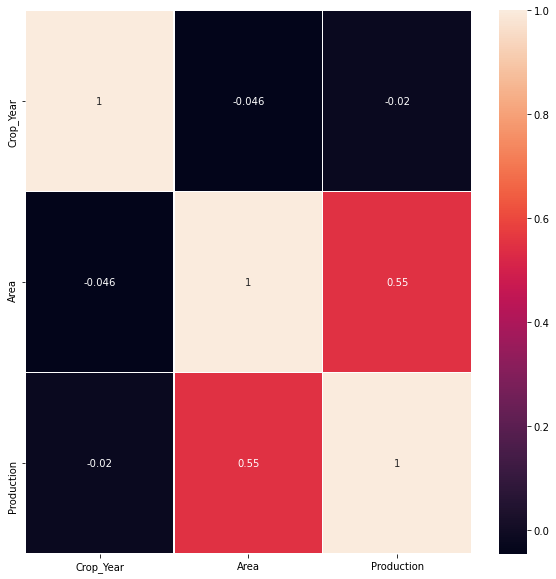

In [34]:
# Correlation
# sns.heatmap(df.corr(),annot=True)
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(df1.corr(), annot=True, linewidths=.5, ax=ax)

# preprcessing

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
#To change catagorical records to numarcal record
from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df[df.select_dtypes(include=['object']).columns] = df[df.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [37]:
# df['Season'] = le.fit_transform(df['Season'])
state_le = LabelEncoder()
state_le = state_le.fit(df1['State_Name'])
df1['State_Name'] =state_le.transform(df1['State_Name'])
dump(state_le,'../models/State_le.joblib')

['../models/State_le.joblib']

In [38]:
District_le = LabelEncoder()
District_le = District_le.fit(df1['District_Name'])
df1['District_Name'] =District_le.transform(df1['District_Name'])
dump(District_le,'../models/District_le.joblib')

['../models/District_le.joblib']

In [39]:
Season_le = LabelEncoder()
# Season_le.fit(pd.concat([x_train[col], x_test[col]], sort=False))
Season_le = Season_le.fit(df1['Season'])
df1['Season'] =Season_le.transform(df1['Season'])
dump(Season_le,'../models/Season_le.joblib')

['../models/Season_le.joblib']

In [40]:
# Crop_le = le.fit_transform(df['Crop'])
Crop_le = LabelEncoder()
Crop_le = Crop_le.fit(df1['Crop'])
df1['Crop'] =Crop_le.transform(df1['Crop'])
dump(Crop_le,'../models/Crop_le.joblib')

['../models/Crop_le.joblib']

In [41]:
df1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254,2000
1,0,427,2000,1,74,2,1
2,0,427,2000,1,95,102,321
3,0,427,2000,4,7,176,641
4,0,427,2000,4,22,720,165


In [42]:
model = []
score = []

In [43]:
df1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254,2000
1,0,427,2000,1,74,2,1
2,0,427,2000,1,95,102,321
3,0,427,2000,4,7,176,641
4,0,427,2000,4,22,720,165


In [44]:
features = df1.drop(['Production'],axis=1)
target = df1['Production']
print(features)
print(target)

        State_Name  District_Name  Crop_Year  Season  Crop  Area
0                0            427       2000       1     2  1254
1                0            427       2000       1    74     2
2                0            427       2000       1    95   102
3                0            427       2000       4     7   176
4                0            427       2000       4    22   720
...            ...            ...        ...     ...   ...   ...
221686          32            471       2014       3    59   325
221687          32            471       2014       3    95   306
221688          32            471       2014       3   102   627
221689          32            471       2014       4   106   324
221690          32            471       2014       5   102   175

[221691 rows x 6 columns]
0          2000
1             1
2           321
3           641
4           165
          ...  
221686     2039
221687      801
221688      463
221689    16250
221690       88
Name: Production,

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size = 0.2,random_state =0)

# Decision tree

In [58]:
# Import decision tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [59]:
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [60]:
pred_dt = dt_model.predict(x_test)
pred_dt1 = dt_model.predict(x_train)

In [61]:
model.append('decision tree')

RMSE score test: 5625.7480632038705
RMSE score train: 0.0
R2 score: 0.7999814920234295
MAE score: 1802.581722636956
test data Variance score: 0.80
train data Variance score: 1.00

Scatter plot of y_test against y_pred:


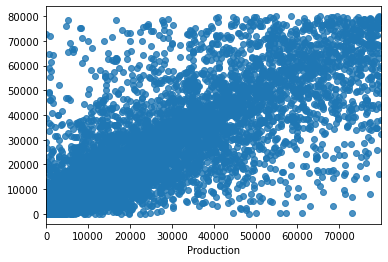

In [62]:
rmse_dt = sqrt(mean_squared_error(y_test, pred_dt))
rmse_dt1 = sqrt(mean_squared_error(y_train, pred_dt1))
rsquared_dt = r2_score(y_test, pred_dt)
mae_dt = mean_absolute_error(y_test, pred_dt)

score.append(rsquared_dt)

print('RMSE score test:', rmse_dt)
print('RMSE score train:', rmse_dt1)
print('R2 score:', rsquared_dt)
print('MAE score:', mae_dt)

print('test data Variance score: %.2f' % dt_model.score(x_test, y_test))
print('train data Variance score: %.2f' % dt_model.score(x_train, y_train))

print('\nScatter plot of y_test against y_pred:')
sns.regplot(y_test, pred_dt);

In [63]:
import pickle
# Dump the trained Decision Tree classifier with Pickle
DT_pkl_filename = '../models/YieldDecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(dt_model, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [64]:
# parameters={"splitter":["best","random"],
#             "max_depth" : [1,3,5,7,9,11,12],
#            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#            "max_features":["auto","log2","sqrt",None],
#            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [65]:
# tuning_model=GridSearchCV(dt_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [66]:
# tuning_model.fit(x_train, y_train)

In [67]:
# tuning_model.best_params_

In [89]:
score = dict(zip(model, score))
for k, v in score.items():
    print (k, '-->', v*100)

decision tree --> 79.99814920234294


# prediction

In [90]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720,165


In [91]:
State_Name = 'Andaman and Nicobar Islands'
District_Name = 'NICOBARS'
Season = 'Whole Year'
Crop = 'Banana'

# State_Name = input('enter state:')
# District_Name = input('enter District:')
Crop_Year = input('enter year:')
# Season = input('enter Season:')
# Crop = input('enter Crop:')
Area = input('enter Area:')

# State_Name = State_Name.lower()
# State_Name = State_Name.strip()
# District_Name = District_Name.lower()
# District_Name = District_Name.strip()
# Crop = Crop.lower()
# Crop = Crop.strip()
# Season = Season.lower()
# Season = Season.strip()

state_model=load('..\models\State_le.joblib')
State_Name =state_model.transform([State_Name])

District_model=load("..\models\District_le.joblib")
District_Name = District_model.transform([District_Name])

Season_model=load('..\models\Season_le.joblib')
Season = Season_model.transform([Season])

Crop_model=load("..\models\Crop_le.joblib")
Crop = Crop_model.transform([Crop])

# if Season == 'kharif':
#     Season = 0
# elif Season == 'whole year':
#     Season = 1
# elif Season == 'autumn':
#     Season = 2
# elif Season == 'rabi':
#     Season = 3
# elif Season == 'summer':
#     Season = 4
# elif Season == 'winter':
#     Season = 5

enter year:2000
enter Area:154


In [92]:
out = dt_model.predict([[State_Name,
                        District_Name,
                        Crop_Year,
                        Season,
                        Crop,
                        Area]])
print(out)

[6080.]


In [93]:
# -------------------------------------------------END-------------------------------------------------------